In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import ticker, cm
from numpy.linalg import norm
from matplotlib.colors import LogNorm

#Algorithm 1: Gradient Descent Procedure with Line Search to compute step length

Require: Starting point $x_0$, Stopping tolerance τ

1: Initialize k = 0, $p_k = −∇f(x_k)$

2: while $∥p_k∥_2 > τ $ do

3: $η_k ← arg min_{η≥0} f(x_k + ηp_k) = arg min_{η≥0} f(x_k − η∇f(x_k))$

4: $x_{k+1} ← x_k + η_kp_k$

5:$ p_k ← −∇f(x_k)$

6: k ← k + 1

7: Output: x_k


$ f(x) = f(x_1,x_2) = 256(x_1 - x_2^2)^2 + (2-x_1)^2 $     
     $ g(x) = g(x_1,x_2) = (x_1 +49)^2 +(x_2 - 36)^2 $

**1. Write the function g(x) in the form $x^⊤Ax + b^⊤x + c$, where $x ∈ R^2$
, A is a symmetric matrix of size 2 × 2,
$b ∈ R^2$ and c ∈ R. Also find the minimizer and the minimum function value of each of f(x) and g(x)**

We know g(x) quadratic function where:

$g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2 = x_1^2 + x_2^2 + 98x_1 - 72x_2 + 49^2 + 36^2$

$g(\mathbf{x}) = \mathbf{x}^T\begin{bmatrix}1 \ \ 0\\ 0 \ \  1\end{bmatrix}\mathbf{x} + \begin{bmatrix}98 \ \ -72\end{bmatrix}\mathbf{x} + 3697$

where $\mathbf{x} = \begin{bmatrix} x_1  \\ x_2 \end{bmatrix}$ and A is the identity matrix, while b is given above.


The function $f(x_1, x_2) = 256(x_2-x_1^2)^2 + (2-x_1)^2$ is always positive, hence its minimum value will be 0. This is possible when the minimizer will be $(2,4)$.


Similarly for $g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2$, we can easily see that $(-49, 36)$ is the minimizer and objective value is 0.

**2. Find the analytical solution to $min_{α≥0} g(x−α∇g(x))$ in closed form. Also prove or disprove that the analytical
solution to $min_{α≥0} f(x − α∇f(x))$ can be found in closed form.**

$
arg\,min_{\alpha \geq 0} \quad g(x-\alpha \nabla g(x))
$

We have $\nabla g(x)=\left\langle 2\left(x_1+49\right), 2\left(x_2-36\right)\right\rangle$
$
\Rightarrow x-\alpha \nabla g(x)=\left\langle x_1-2 \alpha\left(x_1+49\right), x_2-2 \alpha\left(x_2-36\right)\right\rangle
$
$\Rightarrow g(x-\alpha \nabla g(x))=\left(x_1-2 \alpha\left(x_1+49\right)+49\right)^2 +\left(x_2-2 \alpha\left(x_2-36\right)-36\right)^2 \\
= \quad\left(x_1+49\right)^2(1-2 \alpha)^2+\left(x_2-36\right)^2(1-2 \alpha)^2
$

Assuming $\quad \gamma(\alpha)=g(x-\alpha \nabla g(x))$

Minimizing $\gamma(\alpha)$ will result in $\operatorname{argmin}_{\alpha \geqslant 0} g(x-\alpha \nabla g(x))$

We notice that $\gamma(\alpha)$ again is an always positive function hence,
Minimum can be achieved if $\alpha = 0.5$, for which $\gamma(\alpha)=0$ which is lowest possible.
Therefore, $\alpha = 0.5$ is the exact line search coefficient which is in closed form.

**3. Implement Algorithm - 1 for function g(x), starting from the initial point $x_0 = (36, −49)$, explore a range
of tolerances $τ = 10^{−p}$
for p = 1, 2, . . . , 15. Record the number of iterations required for the algorithm to
converge for each tolerance. Generate a plot illustrating the relationship between the number of iterations and
the tolerance values. Compare and contrast this plot with those obtained for the same function g(x) using the
Algorithm - 2 of LAB-01 where fixed step length value (η = 0.001) was used. Plot the level sets of the
function g(x) and also plot the trajectory of the optimization on the same plot for both exact line search method
and the fixed step length method of gradient descent algorithm and report your observations.**


##Algorithm 1

In [29]:
def f(x):
  return (x[0] + 49)**2 + (x[1] - 36)**2
def grad_f(x):
  return np.array([2*(x[0]+49)  ,  2*(x[1]-36)])

def grad_descent(f,grad_f,x0,tolerance,step_size):
  x = x0
  trajectory = []
  k = 0
  while np.linalg.norm(grad_f(x)) >tolerance:
    x = x - step_size*grad_f(x)
    k = k+1
    trajectory.append(x)
  return x,k

In [30]:
x0 = np.array([36,-49])
tolerance = [10**-p for p in range(1,16)]
step_size = 0.5
minimizers1 = []

num_iterations1 = []

for tol in tolerance:

  minimizer,k= grad_descent(f,grad_f,x0,tol,step_size)
  minimizers1.append(minimizer)
  num_iterations1.append(k)


In [37]:
print(trajectory)

[[ 36.         -49.        ]
 [ 35.83       -48.83      ]
 [ 35.66034    -48.66034   ]
 ...
 [-48.99999646  35.99999646]
 [-48.99999646  35.99999646]
 [-48.99999647  35.99999647]]


In [31]:
print('Minimizers', minimizers1)
print('No of iterations', num_iterations1)

Minimizers [array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.])]
No of iterations [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


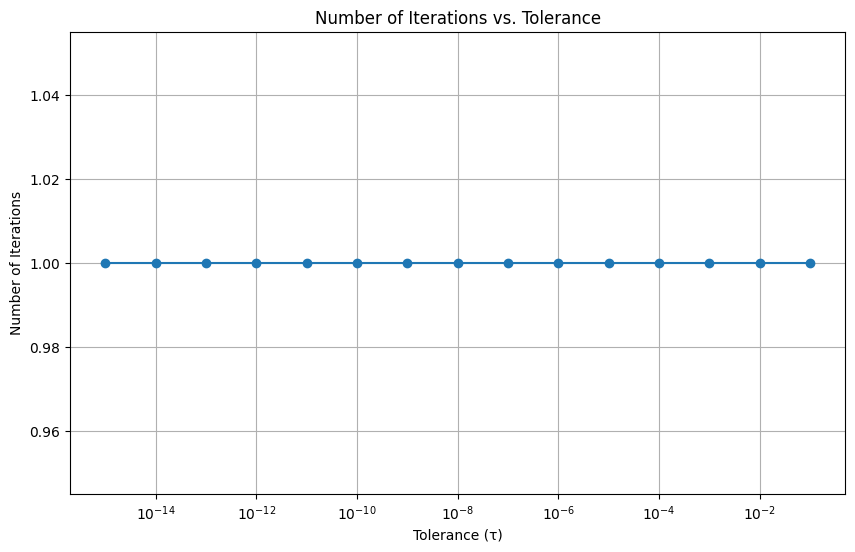

In [32]:
plt.figure(figsize=(10, 6))
plt.semilogx(tolerance, num_iterations1, marker='o')
plt.title('Number of Iterations vs. Tolerance')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.grid(True)
plt.show()

##Algorithm 2 of lab 1

In [33]:
minimizers2 = []
num_iterations2 = []
step_size = 0.001
tolerance = [10**-p for p in range(12)]
for tol in tolerance:

  minimizer,k= grad_descent(f,grad_f,x0,tol,step_size)
  minimizers2.append(minimizer)
  num_iterations2.append(k)

In [34]:
print('Minimizers : ',minimizers2)
print('No of iterations : ', num_iterations2)

Minimizers :  [array([-48.64684,  35.64684]), array([-48.96467404,  35.96467404]), array([-48.99646641,  35.99646641]), array([-48.99964654,  35.99964654]), array([-48.99996471,  35.99996471]), array([-48.99999647,  35.99999647]), array([-48.99999965,  35.99999965]), array([-48.99999996,  35.99999996]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.]), array([-49.,  36.])]
No of iterations :  [2739, 3889, 5039, 6189, 7340, 8490, 9640, 10790, 11940, 13090, 14241, 15429]


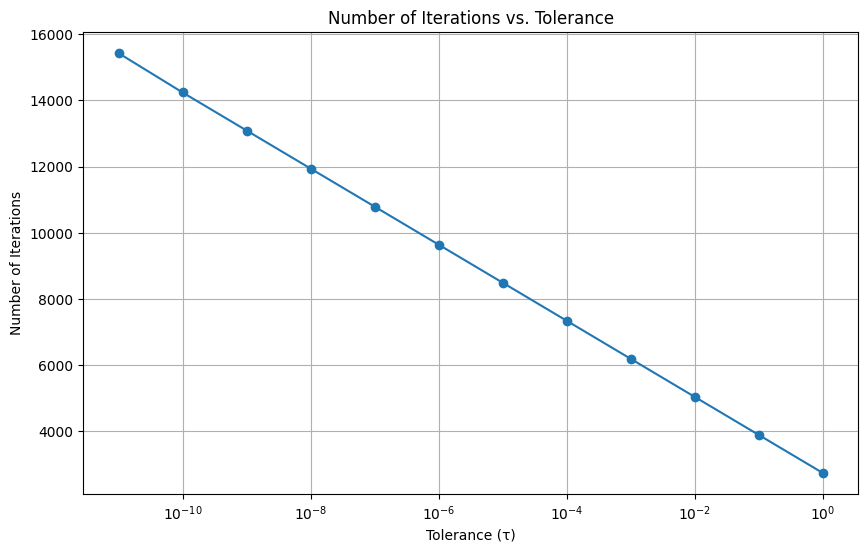

In [40]:
plt.figure(figsize=(10, 6))
plt.semilogx(tolerance, num_iterations2, marker='o')
plt.title('Number of Iterations vs. Tolerance')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.grid(True)
plt.show()

# LEVEL SETS

**4. What may be the shortcomings of this algorithm and suggests a possible solution to deal with it ?**

##Shortcomings

1.The line search process can be computationally expensive, especially if the function to be optimized is complex or requires a large number of iterations to converge. This  algorithm needs to evaluate the objective function multiple times along each search direction to determine the step length and hence it can be computationally expensive.

2.The performance of the algorithm can be sensitive to the initial step length chosen for the line search. If the initial step length is too large, the algorithm may overshoot the minimum and fail to converge. On the other hand, if it is too small, the convergence may be slow.

3.The effectiveness of the algorithm depends on the line search method used to determine the step length. Different line search methods may perform differently for different functions and initial conditions.

##Possible solutions to these shortcomings include:

1. Instead of using a fixed step length or relying solely on line search, adaptive step size strategies  can be used to adjust the step length based on the gradient and previous steps taken. These methods can help in reducing the computational cost and addressing the sensitivity to initial step length.

2.  Preconditioning the problem can help in reducing the number of iterations required for convergence.

